In [259]:
import numpy as np
import pandas as pd


In [260]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [261]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,NaN,NaN,NaN
1508,ham,Sounds like something that someone testing me ...,NaN,NaN,NaN
3442,ham,Your board is working fine. The issue of overh...,NaN,NaN,NaN
2299,spam,Congrats! 1 year special cinema pass for 2 is ...,NaN,NaN,NaN
5409,ham,There is a first time for everything :),NaN,NaN,NaN


In [262]:
df.shape

(5572, 5)

In [263]:
#1. data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model building
#5. Evaluation
#6. improvement
#7. website
#8. deploy



**data cleaning**

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [265]:
# drop last three columns
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [266]:
df.sample()

,v1,v2
963,ham,Yo chad which gymnastics class do you wanna ta...


In [267]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample()

,target,text
2603,ham,\Im at arestaurant eating squid! i will be out...


In [268]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [269]:
df['target']=encoder.fit_transform(df['target'])


In [270]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [271]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [272]:
#check for duplicate values
df.duplicated().sum()

403

In [273]:
df = df.drop_duplicates(keep='first')

In [274]:
df.duplicated().sum()

0

In [275]:
df.shape

(5169, 2)

**2.EDA**

In [276]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [277]:
df.value_counts()

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [278]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

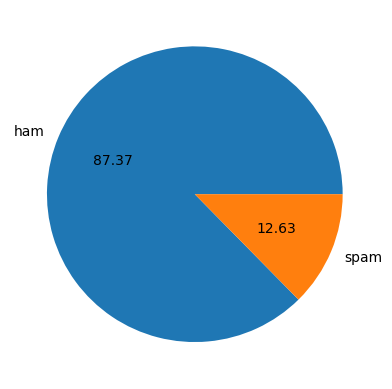

In [279]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [280]:
# data is imbalanced
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [281]:
import nltk
nltk.download('punkt')

print(nltk.data.path)


['C:\\Users\\E/nltk_data', 'C:\\ProgramData\\Anaconda3\\nltk_data', 'C:\\ProgramData\\Anaconda3\\share\\nltk_data', 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data', 'C:\\Users\\E\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\E\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [282]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [283]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))

In [284]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [285]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [286]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [287]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [288]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [289]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [290]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [291]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

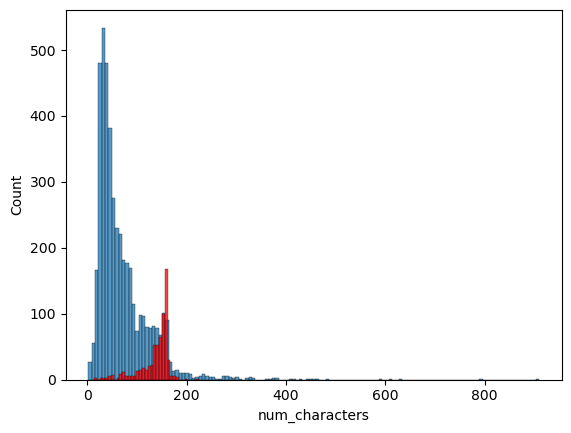

In [292]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

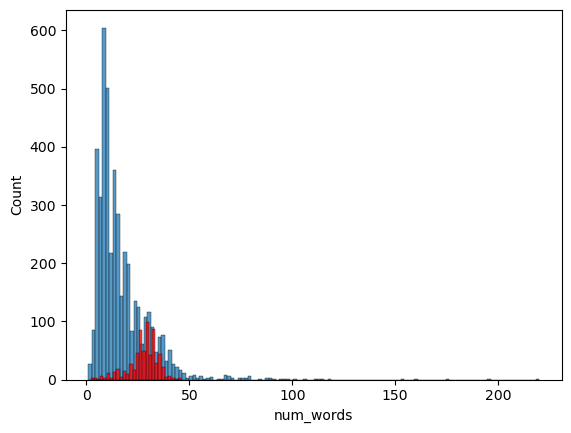

In [293]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

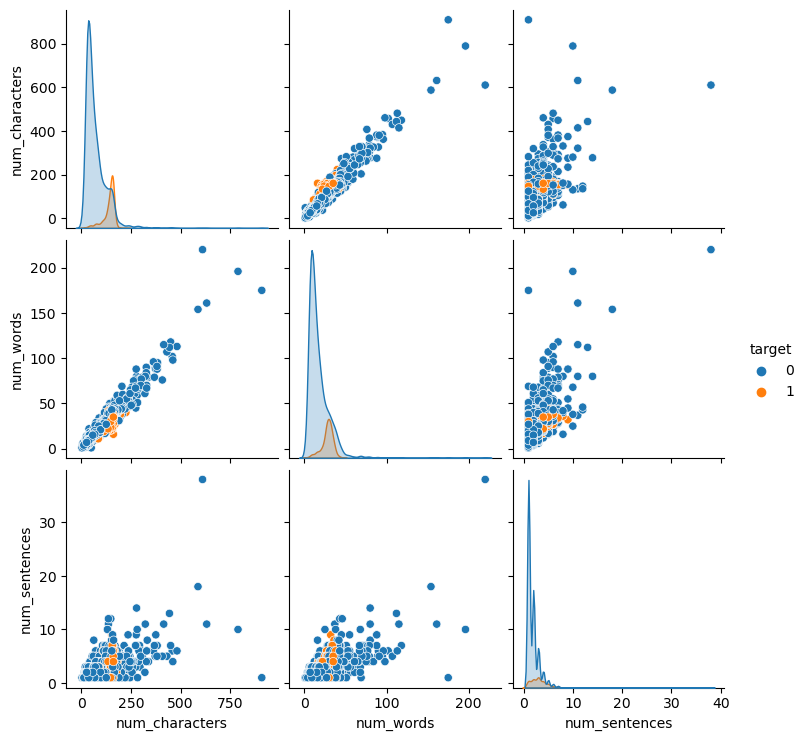

In [294]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

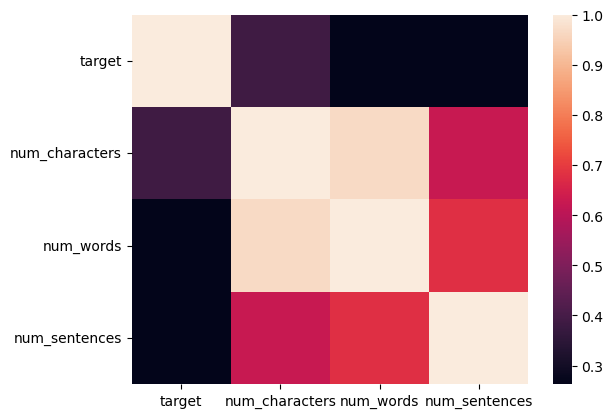

In [295]:
sns.heatmap(df.corr())

**3.Data Preprocessing**

    lower case
    tokenization
    removing special character
    removing stop words
    stemming
    

In [296]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [297]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  ps = PorterStemmer()
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [298]:

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [299]:
transform_text('Hi how are you ml')

'hi ml'

In [300]:
df['text'][1000]

'No..but heard abt tat..'

In [301]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [302]:
df['transformed_text']=df['text'].apply(transform_text)


In [303]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [304]:
!pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')


Defaulting to user installation because normal site-packages is not writeable


In [305]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

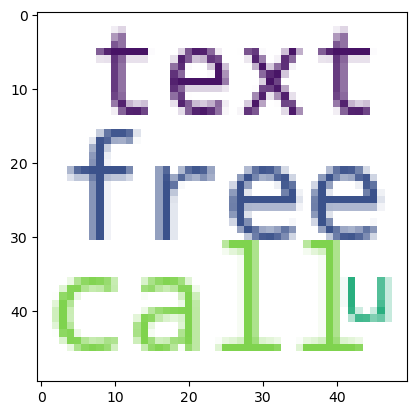

In [306]:
plt.imshow(spam_wc)

In [307]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

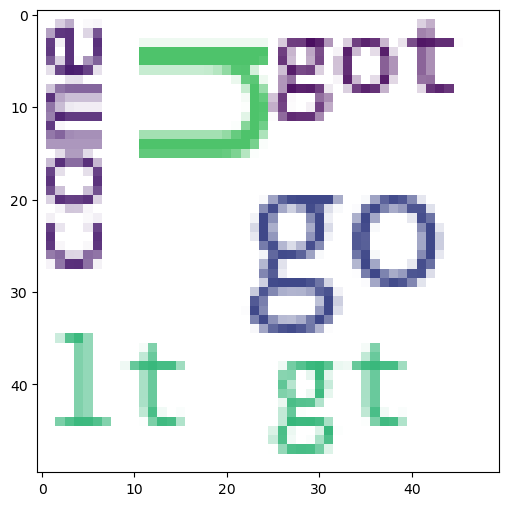

In [308]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [309]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [310]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [311]:
len(spam_corpus)

9939

In [312]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [313]:
ham_corpus = []
for msh in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [314]:
len(ham_corpus)

76772

In [315]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common))
# plt.xticks(rotation='vertical')
# plt.show()

**4.Model Buildings**

In [316]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [356]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [357]:
X=tfidf.fit_transform(df['transformed_text']).toarray()


In [358]:
# X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [359]:
X.shape

(5169, 3000)

In [360]:
y=df['target'].values

In [322]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [323]:
from sklearn.model_selection import train_test_split


In [324]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [325]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [326]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [327]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [328]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [361]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [330]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [331]:
#tfidf --> MNB

In [332]:
!pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [333]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimator=50,random_state=2)



In [334]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [335]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy,precision

In [336]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [337]:
from sklearn.linear_model import LogisticRegression

# Define the LogisticRegression classifier outside the loop
clf = LogisticRegression(penalty='l2')

accuracy_scores = []
precision_scores = []

for name, _ in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print("For ", name)
        print("Accuracy - ", current_accuracy)
        print("Precision - ", current_precision)

        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
    except ValueError as e:
        print(f"Error for {name} classifier: {e}")


For  SVC
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  KN
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  NB
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  DT
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  LR
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  RF
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  AdaBoost
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  ETC
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  GBDT
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  xgb
Accuracy -  0.9564796905222437
Precision -  0.979381443298969


In [338]:
print(len(clfs.keys()))
print(len(accuracy_scores))
print(len(precision_scores))

11
11
11


In [339]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision',ascending=False)

In [340]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.95648,0.979381
1,KN,0.95648,0.979381
2,NB,0.95648,0.979381
3,DT,0.95648,0.979381
4,LR,0.95648,0.979381
5,RF,0.95648,0.979381
6,AdaBoost,0.95648,0.979381
7,BgC,0.95648,0.979381
8,ETC,0.95648,0.979381
9,GBDT,0.95648,0.979381


In [341]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [342]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.95648,0.979381
1,KN,0.95648,0.979381
2,NB,0.95648,0.979381
3,DT,0.95648,0.979381
4,LR,0.95648,0.979381
5,RF,0.95648,0.979381
6,AdaBoost,0.95648,0.979381
7,BgC,0.95648,0.979381
8,ETC,0.95648,0.979381
9,GBDT,0.95648,0.979381


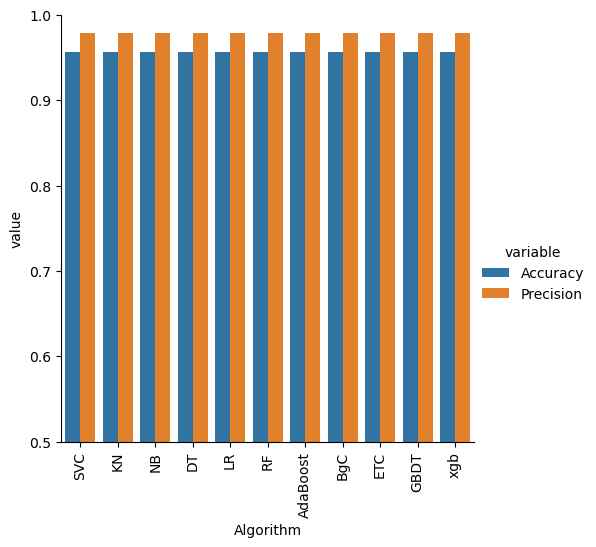

In [343]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [344]:
#model improve

In [345]:
#temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_'})

In [346]:
# Voting Classifier
# svc = SVC(kernel ='sigmoid',gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
# from sklearn.ensemble import VotingClassifier

In [347]:
# voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [348]:
# voting.fit(X_train,y_train)

In [349]:
# voting.fit(X_train,y_train)

In [350]:
# y_pred=voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [351]:
#applying stacking
# estimators=[('svm',svc),('nb',mnb),('et',etc)]
# final_estimators=RandomForestClassifier()

In [352]:
# from sklearn.ensemble import StackingClassifier

In [353]:
#clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [354]:
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [362]:
import pickle

# Save the tfidf vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Save the Multinomial Naive Bayes model
pickle.dump(mnb, open('model.pkl', 'wb'))
